In [1]:
import pandas as pd

In [28]:
#importing identified aca posts
posts = pd.read_csv('../data/processed/aca_posts_3.csv')

posts.head()

,Unnamed: 0,selftext,title,time_created,processed_text,processed_title,processed_title_no_stop
0,0,I am 20 years old and looking to get health in...,20 y/o Male. HSA Silver with Kaiser or Covered...,2021-05-10 18:13:16,20 years old looking get health insurance i'm ...,20 year old male hsa silver with kaiser or cov...,20 year old male hsa silver kaiser covered cal...
1,8,I'm transitioning from SSI (which automaticall...,SSDI waiting for medicare. ACA medicaid conflict,2021-05-10 03:02:01,i'm transitioning ssi automatically qualifies ...,ssdi waiting for medicare aca medicaid conflict,ssdi waiting medicare aca medicaid conflict
2,15,Propublica wrote an excellent article on the p...,The dangers of buying non-ACA compliant insura...,2021-05-09 01:22:14,propublica wrote excellent article pitfalls bu...,the dangers of buying non-aca compliant insura...,dangers buying non-aca compliant insurance plans
3,18,* Currently in our special enrollment period a...,Just married! Spouse is a.) *not* eligible for...,2021-05-08 01:45:27,currently special enrollment period wedding on...,just married spouse is a not eligible for aca ...,married spouse eligible aca medicaid b low inc...
4,22,Situation: my children’s mother is an addict. ...,Can you have Medicaid and an ACA plan? Need be...,2021-05-07 21:14:48,situation: children’s mother addict trying get...,can you have medicaid and an aca plan need bet...,medicaid aca plan need better rehab treatment


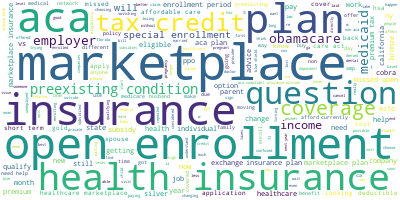

In [29]:
#now doing it for post titles
from wordcloud import WordCloud

#Join the different posts together.
long_string = ','.join(list(posts['processed_title'].values))

#Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

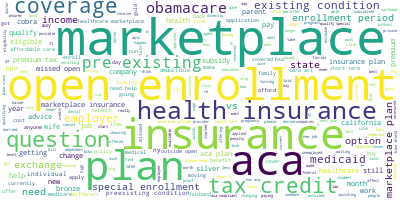

In [30]:
#now doing it for post titles
from wordcloud import WordCloud

#Join the different posts together.
long_string = ','.join(list(posts['processed_title_no_stop'].values))

#Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

C:\Users\madat\AppData\Local\Continuum\anaconda3\envs\aca-forum\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


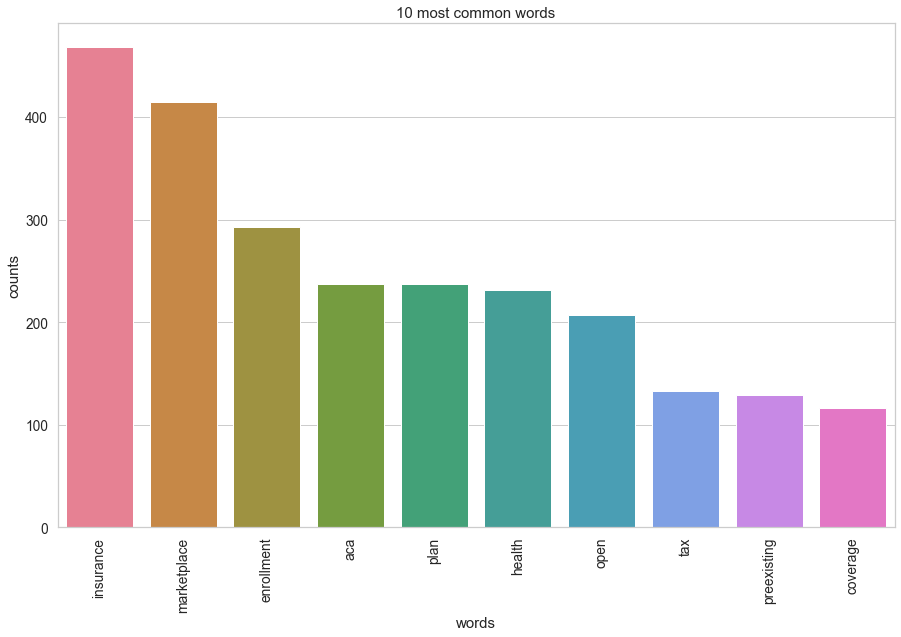

In [31]:
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
    
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(posts['processed_title'])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

C:\Users\madat\AppData\Local\Continuum\anaconda3\envs\aca-forum\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


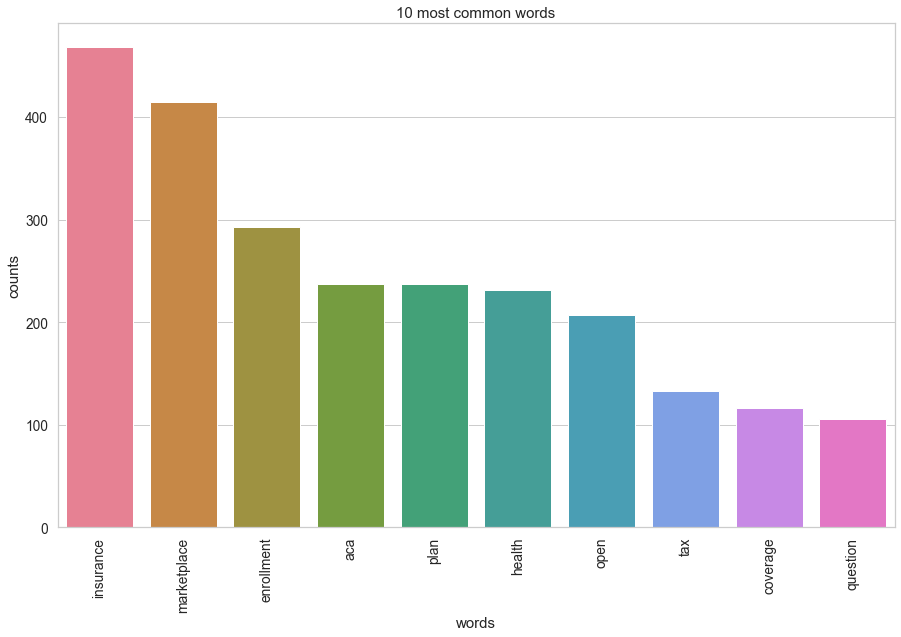

In [33]:
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
    
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(posts['processed_title_no_stop'])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [32]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA


# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

In [9]:
number_words = 15

#topics = [5, 10, 20, 50, 100, 250]

topics = [5, 10, 15, 20, 25, 35, 50, 100]

for topic in topics:
    # Create and fit the LDA mode;
    print('With {} number of topics'.format(str(topic)))
    lda = LDA(n_components = topic, n_jobs=-1)
    lda.fit(count_data)
    
    # Print the topics found by the LDA model
    print("Topics found via LDA:")
    print_topics(lda, count_vectorizer, number_words)
    print('******************************************************************************************************************************')

With 5 number of topics
Topics found via LDA:

Topic #0:
marketplace aca insurance plan obamacare healthcare coverage cobra pay vs exchange 1095 qualify health help

Topic #1:
insurance health aca marketplace plan employer bronze vs ppo coverage obamacare plans california term gold

Topic #2:
insurance marketplace pre existing plan health condition conditions help new question state aca plans exchange

Topic #3:
enrollment open marketplace insurance special aca period question medicaid missed coverage plan job plans change

Topic #4:
tax credit insurance premium marketplace health income credits aca care affordable job question act year
******************************************************************************************************************************
With 10 number of topics
Topics found via LDA:

Topic #0:
pre existing condition conditions insurance credits aca question tax preexisting health coverage policy income self

Topic #1:
insurance marketplace aca health plan outsi

In [16]:
## trying with gensim

# lemmazation of titles

import nltk
#nltk.download('wordnet')

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()


def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\madat\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [34]:
posts['title_lemmatized'] = posts['processed_title'].apply(lemmatize_text)
posts['title_no_stop_lemmatized'] = posts['processed_title_no_stop'].apply(lemmatize_text)

posts.head()

,Unnamed: 0,selftext,title,time_created,processed_text,processed_title,processed_title_no_stop,title_lemmatized,title_no_stop_lemmatized
0,0,I am 20 years old and looking to get health in...,20 y/o Male. HSA Silver with Kaiser or Covered...,2021-05-10 18:13:16,20 years old looking get health insurance i'm ...,20 year old male hsa silver with kaiser or cov...,20 year old male hsa silver kaiser covered cal...,"[20, year, old, male, hsa, silver, with, kaise...","[20, year, old, male, hsa, silver, kaiser, cov..."
1,8,I'm transitioning from SSI (which automaticall...,SSDI waiting for medicare. ACA medicaid conflict,2021-05-10 03:02:01,i'm transitioning ssi automatically qualifies ...,ssdi waiting for medicare aca medicaid conflict,ssdi waiting medicare aca medicaid conflict,"[ssdi, waiting, for, medicare, aca, medicaid, ...","[ssdi, waiting, medicare, aca, medicaid, confl..."
2,15,Propublica wrote an excellent article on the p...,The dangers of buying non-ACA compliant insura...,2021-05-09 01:22:14,propublica wrote excellent article pitfalls bu...,the dangers of buying non-aca compliant insura...,dangers buying non-aca compliant insurance plans,"[the, danger, of, buying, non-aca, compliant, ...","[danger, buying, non-aca, compliant, insurance..."
3,18,* Currently in our special enrollment period a...,Just married! Spouse is a.) *not* eligible for...,2021-05-08 01:45:27,currently special enrollment period wedding on...,just married spouse is a not eligible for aca ...,married spouse eligible aca medicaid b low inc...,"[just, married, spouse, is, a, not, eligible, ...","[married, spouse, eligible, aca, medicaid, b, ..."
4,22,Situation: my children’s mother is an addict. ...,Can you have Medicaid and an ACA plan? Need be...,2021-05-07 21:14:48,situation: children’s mother addict trying get...,can you have medicaid and an aca plan need bet...,medicaid aca plan need better rehab treatment,"[can, you, have, medicaid, and, an, aca, plan,...","[medicaid, aca, plan, need, better, rehab, tre..."


In [41]:
# Bi and trigrams in the corpus

import gensim
from gensim.utils import simple_preprocess

#making the raw corpus
texts = posts['processed_title_no_stop'].values.tolist()

#tokenize words
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True)) 

text_words = list(sent_to_words(texts))

print(text_words)

[['year', 'old', 'male', 'hsa', 'silver', 'kaiser', 'covered', 'california', 'financial', 'assistance'], ['ssdi', 'waiting', 'medicare', 'aca', 'medicaid', 'conflict'], ['dangers', 'buying', 'non', 'aca', 'compliant', 'insurance', 'plans'], ['married', 'spouse', 'eligible', 'aca', 'medicaid', 'low', 'income', 'currently', 'qualified', 'temporary', 'discount', 'hospital', 'services', 'adding', 'spouse', 'insurance', 'mo', 'copays', 'deductibles', 'etc', 'info', 'inside', 'thank'], ['medicaid', 'aca', 'plan', 'need', 'better', 'rehab', 'treatment'], ['come', 'marketplace', 'always', 'unavailable'], ['health', 'insurance', 'years', 'need', 'help', 'tax', 'credit'], ['marketplace', 'coverage', 'vs', 'medicaid'], ['looking', 'marketplace', 'insurance', 'need', 'help'], ['estimate', 'income', 'aca'], ['question', 'regarding', 'medicaid', 'marketplace', 'aptc'], ['stay', 'parent', 'marketplace', 'plan'], ['marketplace', 'insurance'], ['opt', 'use', 'husbands', 'employer', 'sponsored', 'insura

In [42]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(text_words, min_count=5, threshold=100) #
trigram = gensim.models.Phrases(bigram[text_words], threshold=100)

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [44]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]